In [1]:
#For some reason this has to be run twice.
import matplotlib
matplotlib.use('TKAgg')
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### for operations on FITS images
from astropy.io import fits

### statistics functions
from scipy import stats
from scipy.stats import norm

In [2]:
#LOOP TO OPEN ALL THE DARKS FILES AND STORE THE IMAGEDATA INTO A LIST
allDarks30s = [] #30s ExpTime Darks
allDarks20s = [] #20s ExpTime Darks
for i in range (0, 10):
  hdulist = fits.open(r'C:\Users\zombi\Desktop\The Cool Group (Jack Jon Melinda)\Lab2\Darks\TOI1516_Darks.0000000' + str(i) + '.DARK.FIT')
  imagedata = hdulist[0].data
  allDarks30s.append(imagedata)

for i in range (10, 20):
  hdulist = fits.open(r'C:\Users\zombi\Desktop\The Cool Group (Jack Jon Melinda)\Lab2\Darks\TOI1516_Darks.000000' + str(i) + '.DARK.FIT')
  imagedata = hdulist[0].data
  allDarks20s.append(imagedata)

#MAKES THE MASTERDARKs
masterDark30s = np.median(allDarks30s, axis=0)
masterDark20s = np.median(allDarks20s, axis=0)

In [3]:
#LOOP TO OPEN ALL THE FLAT FILES AND STORE THE IMAGEDATA INTO A LIST
allFlats = []
for i in range (0, 10):
  hdulist = fits.open(r'C:\Users\zombi\Desktop\The Cool Group (Jack Jon Melinda)\Lab2\Flats\TOI1516_FLATSTRUE_.0000000' + str(i) + '.FIT')
  imagedata = hdulist[0].data
  allFlats.append(imagedata)

#MAKES THE MASTERFLAT
masterFlat = np.median(allFlats, axis=0)
countvalues = masterFlat.flatten()
mode = stats.mode(countvalues)[0][0]
masterFlat = masterFlat / mode

hdu = fits.PrimaryHDU(masterFlat)
hdu.writeto(r'C:\Users\zombi\Desktop\The Cool Group (Jack Jon Melinda)\Lab2\Flats\TOI1516_masterFlat.FIT', overwrite = True)

In [4]:
allSciences30s = []
allSciences20s = []
header20s = []
header30s = []
for i in range(0, 494): 
  #For some reason we don't have a science file at these indexes
  if i == 143 or i == 331:
    continue;
  if i < 10:
    hdulist = fits.open(r'C:\Users\zombi\Desktop\The Cool Group (Jack Jon Melinda)\Lab2\Science\TOI1516_.0000000' + str(i) + '.FIT')
    header = hdulist[0].header
  elif i >= 10 and i < 100:
    hdulist = fits.open(r'C:\Users\zombi\Desktop\The Cool Group (Jack Jon Melinda)\Lab2\Science\TOI1516_.000000' + str(i) + '.FIT')
    header = hdulist[0].header
  else: 
    hdulist = fits.open(r'C:\Users\zombi\Desktop\The Cool Group (Jack Jon Melinda)\Lab2\Science\TOI1516_.00000' + str(i) + '.FIT')
    header = hdulist[0].header
  imagedata = hdulist[0].data
  expTime = hdulist[0].header['EXPTIME']
  if (expTime == 20):
    allSciences20s.append(imagedata)
    header20s.append(header)
  elif (expTime == 30):
    allSciences30s.append(imagedata) 
    header30s.append(header)

In [5]:
print(len(allSciences20s))
print(len(allSciences30s))

187
305


In [6]:
appliedSciences20s = allSciences20s - masterDark20s
appliedSciences30s = allSciences30s - masterDark30s
appliedSciences20s = appliedSciences20s / masterFlat
appliedSciences30s = appliedSciences30s / masterFlat

In [7]:
for i in range(len(appliedSciences20s)):
    hdu = fits.PrimaryHDU(appliedSciences20s[i], header = header20s[i])
    hdu.writeto(r'C:\Users\zombi\Desktop\The Cool Group (Jack Jon Melinda)\Lab2\Processed Sciences\TOI1516_processedScience.' + str(i) + '.FIT', overwrite = True)
for i in range(len(appliedSciences30s)):
    hdu = fits.PrimaryHDU(appliedSciences30s[i], header = header30s[i])
    hdu.writeto(r'C:\Users\zombi\Desktop\The Cool Group (Jack Jon Melinda)\Lab2\Processed Sciences\TOI1516_processedScience.' + str(i + len(appliedSciences20s)) + '.FIT', overwrite = True)

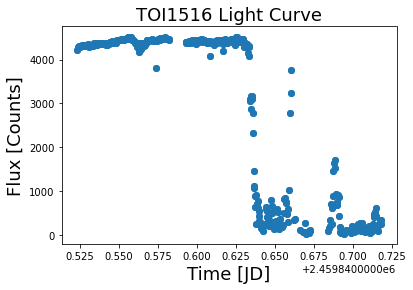

,Time [JD],Flux [Counts],Flux Error [Counts]
0,2.459841e+06,4463.9725,12.422725
1,2.459841e+06,4461.8350,12.417385
2,2.459841e+06,4401.0895,12.350670
3,2.459841e+06,4399.3855,12.349415
4,2.459841e+06,4419.0810,12.357080
...,...,...,...
439,2.459841e+06,4402.2115,12.355825
440,2.459841e+06,4402.5580,12.334205
441,2.459841e+06,4442.1240,12.373085
442,2.459841e+06,4449.7385,12.385700


In [94]:
import pandas as pd
import os

path = r"C:\Users\zombi\Desktop\The Cool Group (Jack Jon Melinda)\Lab2\CATNEW"
dir_list = os.listdir(path)
hostStarFlux = []
hostStarFluxUnc = []
fileIndex = []
for j in range(444):
    df = pd.read_csv(path + "\\" + str(dir_list[j]), delim_whitespace=True, skiprows=17, header=None, usecols=[3,4,5,6])
    dfArray = df.to_numpy()
    s = str(dir_list[j])
    r = ''.join(x for x in s if x.isdigit())
    r = int(r)
    if r < 100000:
        r %= 10
    if r < 1000000:
        r %= 100
    if r < 10000000:
        r %= 1000
    #We need RA = 340.084417, Dec = 69.50375
    #THIS FINDS OUR STAR!
    size = len(dfArray)
    for i in range(size):
        #starsFound = 0
        if (dfArray[i][0] > 340.08) & (dfArray[i][0] < 340.09):
            if(dfArray[i][1] > 69.5) & (dfArray[i][1] < 69.505):
                flux = dfArray[i][2]
                fluxUnc = dfArray[i][3]
                hostStarFlux.append(flux)
                hostStarFluxUnc.append(fluxUnc) 
                fileIndex.append(r)

#Getting at what time each exposure was taken
from astropy.time import Time
hostStarTimes = []
hostStarExpTimes = []
datesObs = []
path = r"C:\Users\zombi\Desktop\The Cool Group (Jack Jon Melinda)\Lab2\Processed Sciences"
dir_list = os.listdir(path)
for i in fileIndex:
    string = dir_list[i]
    beg = string[:25]
    end = string[-4:]
    string = beg + str(i) + end
    hdulist = fits.open(path + "\\" + string)   
    fitsTime = hdulist[0].header["DATE-OBS"]
    datesObs.append(fitsTime)
    expTime = hdulist[0].header["EXPTIME"]
    t = Time(fitsTime)
    t = t.to_value('jd')
    hostStarTimes.append(t)
    hostStarExpTimes.append(expTime)

hostStarFluxArr = np.array([hostStarFlux])
hostStarFluxUncArr = np.array([hostStarFluxUnc])
hostStarExpTimesArr = np.array([hostStarExpTimes])
hostStarTimesArr = np.array([hostStarTimes])
adjustedHostStarFlux = hostStarFluxArr / hostStarExpTimesArr
adjustedHostStarFluxUnc = hostStarFluxUncArr / hostStarExpTimesArr

plt.xlabel('Time [JD]', fontsize = 18)
plt.ylabel('Flux [Counts]', fontsize = 18)
plt.title('TOI1516 Light Curve', fontsize = 18)
plt.scatter(hostStarTimesArr, adjustedHostStarFlux)
plt.errorbar(hostStarTimesArr[0], adjustedHostStarFlux[0], yerr=adjustedHostStarFluxUnc[0], fmt='o')
plt.show()

#Table of Host Star Time Flux Flux Error
dict = {'Time [JD]' : hostStarTimesArr[0], 'Flux [Counts]' : adjustedHostStarFlux[0], 'Flux Error [Counts]' : adjustedHostStarFluxUnc[0]}
hostStarTable = pd.DataFrame(dict)
display(hostStarTable)

In [9]:
#Gets the RA and Dec of each ref star
refStars = np.array([dfArray[16], dfArray[133], dfArray[187], dfArray[219], dfArray[268], dfArray[352], dfArray[353], dfArray[370], dfArray[372], dfArray[407]])
refStarsRA = []
refStarsDec = []
for i in refStars:
    print(i)
    refStarsRA.append(i[0])
    refStarsDec.append(i[1])

[3.40736448e+02 6.94980392e+01 2.78056000e+05 3.91366400e+02]
[  340.2678532    69.3662876 41430.04        195.6618   ]
[  340.3751347    69.4936952 48445.27        204.1788   ]
[  340.0613939    69.3672554 57003.43        214.1108   ]
[  340.1759236    69.4958451 30097.9         181.1542   ]
[3.39861166e+02 6.94490866e+01 3.85546900e+05 4.53153100e+02]
[  339.9839332    69.5188945 42993.33        197.6132   ]
[  339.8756094    69.4815169 35177.54        187.7683   ]
[3.39762621e+02 6.94186293e+01 1.30705300e+05 2.85709000e+02]
[  339.9410927    69.560941  29703.11        180.6007   ]


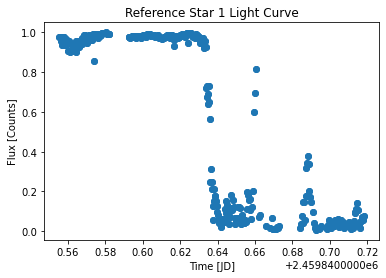

,Time [JD],Flux [Counts],Flux Error [Counts]
0,2.459841e+06,0.991677,0.001391
1,2.459841e+06,0.991168,0.001391
2,2.459841e+06,0.981291,0.001391
3,2.459841e+06,0.987059,0.001391
4,2.459841e+06,0.990170,0.001391
...,...,...,...
356,2.459841e+06,0.978928,0.001391
357,2.459841e+06,0.984885,0.001391
358,2.459841e+06,0.980947,0.001391
359,2.459841e+06,0.989356,0.001391


In [10]:
path = r"C:\Users\zombi\Desktop\The Cool Group (Jack Jon Melinda)\Lab2\CATNEW"
dir_list = os.listdir(path)
accuracy = 0.001
fileIndex = []

#1ST REF STAR
r1Flux = []
r1FluxUnc = []
for j in range(444):
    df = pd.read_csv(path + "\\" + str(dir_list[j]), delim_whitespace=True, skiprows=17, header=None, usecols=[3,4,5,6])
    dfArray = df.to_numpy()
    s = str(dir_list[j])
    r = ''.join(x for x in s if x.isdigit())
    r = int(r)
    if r < 100000:
        r %= 10
    if r < 1000000:
        r %= 100
    if r < 10000000:
        r %= 1000
    size = len(dfArray)
    #Loops thru table to find our star
    for i in range(size):
        if (dfArray[i][0] > (refStarsRA[0] - accuracy)) & (dfArray[i][0] < (refStarsRA[0] + accuracy)):
            if(dfArray[i][1] > (refStarsDec[0] - accuracy)) & (dfArray[i][1] < (refStarsDec[0] + accuracy)):
                flux = dfArray[i][2]
                fluxUnc = dfArray[i][3]
                r1Flux.append(flux)
                r1FluxUnc.append(fluxUnc) 
                fileIndex.append(r)

r1Times = []
r1ExpTimes = []
path = r"C:\Users\zombi\Desktop\The Cool Group (Jack Jon Melinda)\Lab2\Processed Sciences"
dir_list = os.listdir(path)
for i in fileIndex:
    string = dir_list[i]
    beg = string[:25]
    end = string[-4:]
    string = beg + str(i) + end
    hdulist = fits.open(path + "\\" + string)   
    fitsTime = hdulist[0].header["DATE-OBS"]
    expTime = hdulist[0].header["EXPTIME"]
    t = Time(fitsTime)
    t = t.to_value('jd')
    r1Times.append(t)
    r1ExpTimes.append(expTime)

r1Flux = np.array([r1Flux])
r1FluxUnc = np.array([r1FluxUnc])
r1ExpTimes = np.array([r1ExpTimes])
r1Times = np.array([r1Times])
adjustedr1Flux = r1Flux / r1ExpTimes
adjustedr1FluxUnc = r1FluxUnc / r1ExpTimes
#4.4
adjustedr1FluxMax = np.max(adjustedr1Flux)
adjustedr1Flux = adjustedr1Flux / adjustedr1FluxMax
adjustedr1FluxUnc = adjustedr1FluxUnc / adjustedr1FluxMax

#Just ignore this block tbh. BUT DONT DELETE IT. It affects the shape of the array. 
threshold = 0
indices = np.where(adjustedr1Flux < threshold)
adjustedr1FluxUnc[0][indices[1]] = 0
r1Times[0][indices[1]] = 0
adjustedr1Flux = adjustedr1Flux[adjustedr1Flux > threshold]
adjustedr1FluxUnc = adjustedr1FluxUnc[adjustedr1FluxUnc > 0]
r1Times = r1Times[r1Times > 0.001]

plt.xlabel('Time [JD]')
plt.ylabel('Flux [Counts]')
plt.title('Reference Star 1 Light Curve')
plt.scatter(r1Times, adjustedr1Flux)
plt.errorbar(r1Times, adjustedr1Flux, yerr=adjustedr1FluxUnc, fmt='o')
plt.show()

#Table of Refstar1 Time Flux Flux Error
dict = {'Time [JD]' : r1Times, 'Flux [Counts]' : adjustedr1Flux, 'Flux Error [Counts]' : adjustedr1FluxUnc[0]}
r1Table = pd.DataFrame(dict)
display(r1Table)

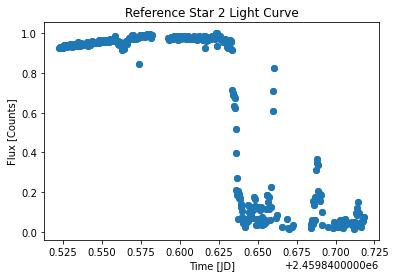

,Time [JD],Flux [Counts],Flux Error [Counts]
0,2.459841e+06,0.990862,0.004678
1,2.459841e+06,0.977238,0.004663
2,2.459841e+06,0.982633,0.004664
3,2.459841e+06,0.980308,0.004662
4,2.459841e+06,0.978609,0.004653
...,...,...,...
424,2.459841e+06,0.982838,0.004661
425,2.459841e+06,0.975092,0.004652
426,2.459841e+06,0.973013,0.004646
427,2.459841e+06,0.974127,0.004646


In [11]:
path = r"C:\Users\zombi\Desktop\The Cool Group (Jack Jon Melinda)\Lab2\CATNEW"
dir_list = os.listdir(path)
accuracy = 0.001
fileIndex = []

#2ND REF STAR
r2Flux = []
r2FluxUnc = []
for j in range(444):
    df = pd.read_csv(path + "\\" + str(dir_list[j]), delim_whitespace=True, skiprows=17, header=None, usecols=[3,4,5,6])
    dfArray = df.to_numpy()
    s = str(dir_list[j])
    r = ''.join(x for x in s if x.isdigit())
    r = int(r)
    if r < 100000:
        r %= 10
    if r < 1000000:
        r %= 100
    if r < 10000000:
        r %= 1000
    size = len(dfArray)
    #Loops thru table to find our star
    for i in range(size):
        if (dfArray[i][0] > (refStarsRA[1] - accuracy)) & (dfArray[i][0] < (refStarsRA[1] + accuracy)):
            if(dfArray[i][1] > (refStarsDec[1] - accuracy)) & (dfArray[i][1] < (refStarsDec[1] + accuracy)):
                flux = dfArray[i][2]
                fluxUnc = dfArray[i][3]
                r2Flux.append(flux)
                r2FluxUnc.append(fluxUnc) 
                fileIndex.append(r)

r2Times = []
r2ExpTimes = []
path = r"C:\Users\zombi\Desktop\The Cool Group (Jack Jon Melinda)\Lab2\Processed Sciences"
dir_list = os.listdir(path)
for i in fileIndex:
    string = dir_list[i]
    beg = string[:25]
    end = string[-4:]
    string = beg + str(i) + end
    hdulist = fits.open(path + "\\" + string)   
    fitsTime = hdulist[0].header["DATE-OBS"]
    expTime = hdulist[0].header["EXPTIME"]
    t = Time(fitsTime)
    t = t.to_value('jd')
    r2Times.append(t)
    r2ExpTimes.append(expTime)
    
r2Flux = np.array([r2Flux])
r2FluxUnc = np.array([r2FluxUnc])
r2ExpTimes = np.array([r2ExpTimes])
r2Times = np.array([r2Times])
adjustedR2Flux = r2Flux / r2ExpTimes
adjustedR2FluxUnc = r2FluxUnc / r2ExpTimes
#4.4
adjustedR2FluxMax = np.max(adjustedR2Flux)
adjustedR2Flux = adjustedR2Flux / adjustedR2FluxMax
adjustedR2FluxUnc = adjustedR2FluxUnc / adjustedR2FluxMax

#Just ignore this block tbh. BUT DONT DELETE IT. It affects the shape of the array. 
threshold = 0
indices = np.where(adjustedR2Flux < threshold)
adjustedR2FluxUnc[0][indices[1]] = 0
r2Times[0][indices[1]] = 0
adjustedR2Flux = adjustedR2Flux[adjustedR2Flux > threshold]
adjustedR2FluxUnc = adjustedR2FluxUnc[adjustedR2FluxUnc > 0.001]
r2Times = r2Times[r2Times > 0.001]

plt.xlabel('Time [JD]')
plt.ylabel('Flux [Counts]')
plt.title('Reference Star 2 Light Curve')
plt.scatter(r2Times, adjustedR2Flux)
plt.errorbar(r2Times, adjustedR2Flux, yerr=adjustedR2FluxUnc, fmt='o')
plt.show()

#Table of Refstar1 Time Flux Flux Error
dict = {'Time [JD]' : r2Times, 'Flux [Counts]' : adjustedR2Flux, 'Flux Error [Counts]' : adjustedR2FluxUnc}
r2Table = pd.DataFrame(dict)
display(r2Table)

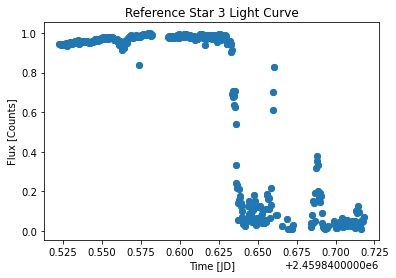

,Time [JD],Flux [Counts],Flux Error [Counts]
0,2.459841e+06,0.986513,0.004177
1,2.459841e+06,0.992721,0.004182
2,2.459841e+06,0.982692,0.004164
3,2.459841e+06,0.968041,0.004148
4,2.459841e+06,0.987389,0.004166
...,...,...,...
430,2.459841e+06,0.983289,0.004165
431,2.459841e+06,0.989512,0.004171
432,2.459841e+06,0.989379,0.004168
433,2.459841e+06,0.986994,0.004165


In [12]:
path = r"C:\Users\zombi\Desktop\The Cool Group (Jack Jon Melinda)\Lab2\CATNEW"
dir_list = os.listdir(path)
accuracy = 0.001
fileIndex = []

#3RD REF STAR
r3Flux = []
r3FluxUnc = []
for j in range(444):
    df = pd.read_csv(path + "\\" + str(dir_list[j]), delim_whitespace=True, skiprows=17, header=None, usecols=[3,4,5,6])
    dfArray = df.to_numpy()
    s = str(dir_list[j])
    r = ''.join(x for x in s if x.isdigit())
    r = int(r)
    if r < 100000:
        r %= 10
    if r < 1000000:
        r %= 100
    if r < 10000000:
        r %= 1000
    size = len(dfArray)
    #Loops thru table to find our star
    for i in range(size):
        if (dfArray[i][0] > (refStarsRA[2] - accuracy)) & (dfArray[i][0] < (refStarsRA[2] + accuracy)):
            if(dfArray[i][1] > (refStarsDec[2] - accuracy)) & (dfArray[i][1] < (refStarsDec[2] + accuracy)):
                flux = dfArray[i][2]
                fluxUnc = dfArray[i][3]
                r3Flux.append(flux)
                r3FluxUnc.append(fluxUnc) 
                fileIndex.append(r)

r3Times = []
r3ExpTimes = []
path = r"C:\Users\zombi\Desktop\The Cool Group (Jack Jon Melinda)\Lab2\Processed Sciences"
dir_list = os.listdir(path)
for i in fileIndex:
    string = dir_list[i]
    beg = string[:25]
    end = string[-4:]
    string = beg + str(i) + end
    hdulist = fits.open(path + "\\" + string)   
    fitsTime = hdulist[0].header["DATE-OBS"]
    expTime = hdulist[0].header["EXPTIME"]
    t = Time(fitsTime)
    t = t.to_value('jd')
    r3Times.append(t)
    r3ExpTimes.append(expTime)
    
r3Flux = np.array([r3Flux])
r3FluxUnc = np.array([r3FluxUnc])
r3ExpTimes = np.array([r3ExpTimes])
r3Times = np.array([r3Times])
adjustedR3Flux = r3Flux / r3ExpTimes
adjustedR3FluxUnc = r3FluxUnc / r3ExpTimes
#4.4
adjustedR3FluxMax = np.max(adjustedR3Flux)
adjustedR3Flux = adjustedR3Flux / adjustedR3FluxMax
adjustedR3FluxUnc = adjustedR3FluxUnc / adjustedR3FluxMax

#Just ignore this block tbh. BUT DONT DELETE IT. It affects the shape of the array. 
threshold = 0
indices = np.where(adjustedR3Flux < threshold)
adjustedR3FluxUnc[0][indices[1]] = 0
r3Times[0][indices[1]] = 0
adjustedR3Flux = adjustedR3Flux[adjustedR3Flux > threshold]
adjustedR3FluxUnc = adjustedR3FluxUnc[adjustedR3FluxUnc > 0.001]
r3Times = r3Times[r3Times > 0.001]

plt.xlabel('Time [JD]')
plt.ylabel('Flux [Counts]')
plt.title('Reference Star 3 Light Curve')
plt.scatter(r3Times, adjustedR3Flux)
plt.errorbar(r3Times, adjustedR3Flux, yerr=adjustedR3FluxUnc, fmt='o')
plt.show()

#Table of Refstar1 Time Flux Flux Error
dict = {'Time [JD]' : r3Times, 'Flux [Counts]' : adjustedR3Flux, 'Flux Error [Counts]' : adjustedR3FluxUnc}
r3Table = pd.DataFrame(dict)
display(r3Table)

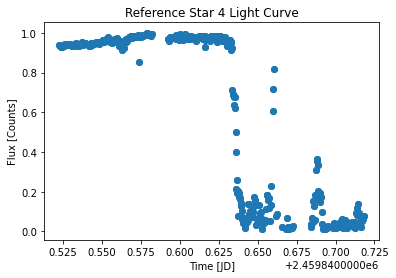

,Time [JD],Flux [Counts],Flux Error [Counts]
0,2.459841e+06,0.984967,0.003680
1,2.459841e+06,0.987831,0.003682
2,2.459841e+06,0.979888,0.003669
3,2.459841e+06,0.975470,0.003665
4,2.459841e+06,0.973410,0.003656
...,...,...,...
435,2.459841e+06,0.975663,0.003664
436,2.459841e+06,0.972495,0.003655
437,2.459841e+06,0.980759,0.003667
438,2.459841e+06,0.983505,0.003667


In [13]:
path = r"C:\Users\zombi\Desktop\The Cool Group (Jack Jon Melinda)\Lab2\CATNEW"
dir_list = os.listdir(path)
accuracy = 0.001
fileIndex = []

#4TH REF STAR
r4Flux = []
r4FluxUnc = []
for j in range(444):
    df = pd.read_csv(path + "\\" + str(dir_list[j]), delim_whitespace=True, skiprows=17, header=None, usecols=[3,4,5,6])
    dfArray = df.to_numpy()
    s = str(dir_list[j])
    r = ''.join(x for x in s if x.isdigit())
    r = int(r)
    if r < 100000:
        r %= 10
    if r < 1000000:
        r %= 100
    if r < 10000000:
        r %= 1000
    size = len(dfArray)
    #Loops thru table to find our star
    for i in range(size):
        if (dfArray[i][0] > (refStarsRA[3] - accuracy)) & (dfArray[i][0] < (refStarsRA[3] + accuracy)):
            if(dfArray[i][1] > (refStarsDec[3] - accuracy)) & (dfArray[i][1] < (refStarsDec[3] + accuracy)):
                flux = dfArray[i][2]
                fluxUnc = dfArray[i][3]
                r4Flux.append(flux)
                r4FluxUnc.append(fluxUnc) 
                fileIndex.append(r)

r4Times = []
r4ExpTimes = []
path = r"C:\Users\zombi\Desktop\The Cool Group (Jack Jon Melinda)\Lab2\Processed Sciences"
dir_list = os.listdir(path)
for i in fileIndex:
    string = dir_list[i]
    beg = string[:25]
    end = string[-4:]
    string = beg + str(i) + end
    hdulist = fits.open(path + "\\" + string)   
    fitsTime = hdulist[0].header["DATE-OBS"]
    expTime = hdulist[0].header["EXPTIME"]
    t = Time(fitsTime)
    t = t.to_value('jd')
    r4Times.append(t)
    r4ExpTimes.append(expTime)
    
r4Flux = np.array([r4Flux])
r4FluxUnc = np.array([r4FluxUnc])
r4ExpTimes = np.array([r4ExpTimes])
r4Times = np.array([r4Times])
adjustedR4Flux = r4Flux / r4ExpTimes
adjustedR4FluxUnc = r4FluxUnc / r4ExpTimes
#4.4
adjustedR4FluxMax = np.max(adjustedR4Flux)
adjustedR4Flux = adjustedR4Flux / adjustedR4FluxMax
adjustedR4FluxUnc = adjustedR4FluxUnc / adjustedR4FluxMax

#Just ignore this block tbh. BUT DONT DELETE IT. It affects the shape of the array. 
threshold = 0
indices = np.where(adjustedR4Flux < threshold)
adjustedR4FluxUnc[0][indices[1]] = 0
r4Times[0][indices[1]] = 0
adjustedR4Flux = adjustedR4Flux[adjustedR4Flux > threshold]
adjustedR4FluxUnc = adjustedR4FluxUnc[adjustedR4FluxUnc > 0.001]
r4Times = r4Times[r4Times > 0.001]

plt.xlabel('Time [JD]')
plt.ylabel('Flux [Counts]')
plt.title('Reference Star 4 Light Curve')
plt.scatter(r4Times, adjustedR4Flux)
plt.errorbar(r4Times, adjustedR4Flux, yerr=adjustedR4FluxUnc, fmt='o')
plt.show()

#Table of Refstar1 Time Flux Flux Error
dict = {'Time [JD]' : r4Times, 'Flux [Counts]' : adjustedR4Flux, 'Flux Error [Counts]' : adjustedR4FluxUnc}
r4Table = pd.DataFrame(dict)
display(r4Table)

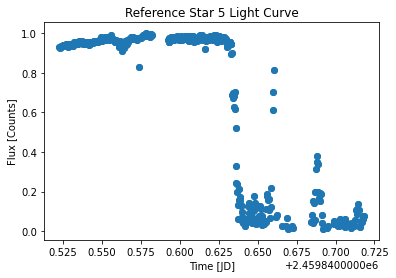

,Time [JD],Flux [Counts],Flux Error [Counts]
0,2.459841e+06,0.996187,0.005923
1,2.459841e+06,0.987438,0.005905
2,2.459841e+06,0.965791,0.005868
3,2.459841e+06,0.978463,0.005889
4,2.459841e+06,0.965670,0.005862
...,...,...,...
423,2.459841e+06,0.987165,0.005892
424,2.459841e+06,0.982276,0.005887
425,2.459841e+06,0.970268,0.005868
426,2.459841e+06,0.973257,0.005868


In [14]:
path = r"C:\Users\zombi\Desktop\The Cool Group (Jack Jon Melinda)\Lab2\CATNEW"
dir_list = os.listdir(path)
accuracy = 0.001
fileIndex = []

#5TH REF STAR
r5Flux = []
r5FluxUnc = []
for j in range(444):
    df = pd.read_csv(path + "\\" + str(dir_list[j]), delim_whitespace=True, skiprows=17, header=None, usecols=[3,4,5,6])
    dfArray = df.to_numpy()
    s = str(dir_list[j])
    r = ''.join(x for x in s if x.isdigit())
    r = int(r)
    if r < 100000:
        r %= 10
    if r < 1000000:
        r %= 100
    if r < 10000000:
        r %= 1000
    size = len(dfArray)
    #Loops thru table to find our star
    for i in range(size):
        if (dfArray[i][0] > (refStarsRA[4] - accuracy)) & (dfArray[i][0] < (refStarsRA[4] + accuracy)):
            if(dfArray[i][1] > (refStarsDec[4] - accuracy)) & (dfArray[i][1] < (refStarsDec[4] + accuracy)):
                flux = dfArray[i][2]
                fluxUnc = dfArray[i][3]
                r5Flux.append(flux)
                r5FluxUnc.append(fluxUnc) 
                fileIndex.append(r)

r5Times = []
r5ExpTimes = []
path = r"C:\Users\zombi\Desktop\The Cool Group (Jack Jon Melinda)\Lab2\Processed Sciences"
dir_list = os.listdir(path)
for i in fileIndex:
    string = dir_list[i]
    beg = string[:25]
    end = string[-4:]
    string = beg + str(i) + end
    hdulist = fits.open(path + "\\" + string)   
    fitsTime = hdulist[0].header["DATE-OBS"]
    expTime = hdulist[0].header["EXPTIME"]
    t = Time(fitsTime)
    t = t.to_value('jd')
    r5Times.append(t)
    r5ExpTimes.append(expTime)
    
r5Flux = np.array([r5Flux])
r5FluxUnc = np.array([r5FluxUnc])
r5ExpTimes = np.array([r5ExpTimes])
r5Times = np.array([r5Times])
adjustedR5Flux = r5Flux / r5ExpTimes
adjustedR5FluxUnc = r5FluxUnc / r5ExpTimes
#4.4
adjustedR5FluxMax = np.max(adjustedR5Flux)
adjustedR5Flux = adjustedR5Flux / adjustedR5FluxMax
adjustedR5FluxUnc = adjustedR5FluxUnc / adjustedR5FluxMax

#Just ignore this block tbh. BUT DONT DELETE IT. It affects the shape of the array. 
threshold = 0
indices = np.where(adjustedR5Flux < threshold)
adjustedR5FluxUnc[0][indices[1]] = 0
r5Times[0][indices[1]] = 0
adjustedR5Flux = adjustedR5Flux[adjustedR5Flux > threshold]
adjustedR5FluxUnc = adjustedR5FluxUnc[adjustedR5FluxUnc > 0.001]
r5Times = r5Times[r5Times > 0.001]

plt.xlabel('Time [JD]')
plt.ylabel('Flux [Counts]')
plt.title('Reference Star 5 Light Curve')
plt.scatter(r5Times, adjustedR5Flux)
plt.errorbar(r5Times, adjustedR5Flux, yerr=adjustedR5FluxUnc, fmt='o')
plt.show()

#Table of Refstar1 Time Flux Flux Error
dict = {'Time [JD]' : r5Times, 'Flux [Counts]' : adjustedR5Flux, 'Flux Error [Counts]' : adjustedR5FluxUnc}
r5Table = pd.DataFrame(dict)
display(r5Table)

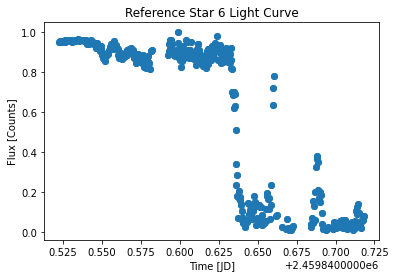

,Time [JD],Flux [Counts],Flux Error [Counts]
0,2.459841e+06,0.905755,0.001082
1,2.459841e+06,0.906213,0.001083
2,2.459841e+06,0.955778,0.001109
3,2.459841e+06,0.880174,0.001068
4,2.459841e+06,0.902522,0.001080
...,...,...,...
438,2.459841e+06,0.894556,0.001076
439,2.459841e+06,0.872327,0.001064
440,2.459841e+06,0.905570,0.001082
441,2.459841e+06,0.863007,0.001058


In [15]:
#DONT USE THIS REFERENCE STAR. IT IS POOPY.
path = r"C:\Users\zombi\Desktop\The Cool Group (Jack Jon Melinda)\Lab2\CATNEW"
dir_list = os.listdir(path)
accuracy = 0.001
fileIndex = []

#6TH REF STAR
r6Flux = []
r6FluxUnc = []
for j in range(444):
    df = pd.read_csv(path + "\\" + str(dir_list[j]), delim_whitespace=True, skiprows=17, header=None, usecols=[3,4,5,6])
    dfArray = df.to_numpy()
    s = str(dir_list[j])
    r = ''.join(x for x in s if x.isdigit())
    r = int(r)
    if r < 100000:
        r %= 10
    if r < 1000000:
        r %= 100
    if r < 10000000:
        r %= 1000
    size = len(dfArray)
    #Loops thru table to find our star
    for i in range(size):
        if (dfArray[i][0] > (refStarsRA[5] - accuracy)) & (dfArray[i][0] < (refStarsRA[5] + accuracy)):
            if(dfArray[i][1] > (refStarsDec[5] - accuracy)) & (dfArray[i][1] < (refStarsDec[5] + accuracy)):
                flux = dfArray[i][2]
                fluxUnc = dfArray[i][3]
                r6Flux.append(flux)
                r6FluxUnc.append(fluxUnc) 
                fileIndex.append(r)

r6Times = []
r6ExpTimes = []
path = r"C:\Users\zombi\Desktop\The Cool Group (Jack Jon Melinda)\Lab2\Processed Sciences"
dir_list = os.listdir(path)
for i in fileIndex:
    string = dir_list[i]
    beg = string[:25]
    end = string[-4:]
    string = beg + str(i) + end
    hdulist = fits.open(path + "\\" + string)   
    fitsTime = hdulist[0].header["DATE-OBS"]
    expTime = hdulist[0].header["EXPTIME"]
    t = Time(fitsTime)
    t = t.to_value('jd')
    r6Times.append(t)
    r6ExpTimes.append(expTime)

r6Flux = np.array([r6Flux])
r6FluxUnc = np.array([r6FluxUnc])
r6ExpTimes = np.array([r6ExpTimes])
r6Times = np.array([r6Times])
adjustedr6Flux = r6Flux / r6ExpTimes
adjustedr6FluxUnc = r6FluxUnc / r6ExpTimes
#4.4
adjustedr6FluxMax = np.max(adjustedr6Flux)
adjustedr6Flux = adjustedr6Flux / adjustedr6FluxMax
adjustedr6FluxUnc = adjustedr6FluxUnc / adjustedr6FluxMax

#Just ignore this block tbh. BUT DONT DELETE IT. It affects the shape of the array. 
threshold = 0
indices = np.where(adjustedr6Flux < threshold)
adjustedr6FluxUnc[0][indices[1]] = 0
r6Times[0][indices[1]] = 0
adjustedr6Flux = adjustedr6Flux[adjustedr6Flux > threshold]
#adjustedr6FluxUnc = adjustedr6FluxUnc[adjustedr6FluxUnc > 0.001]
r6Times = r6Times[r6Times > 0.001]

plt.xlabel('Time [JD]')
plt.ylabel('Flux [Counts]')
plt.title('Reference Star 6 Light Curve')
plt.scatter(r6Times, adjustedr6Flux)
plt.errorbar(r6Times, adjustedr6Flux, yerr=adjustedr6FluxUnc, fmt='o')
plt.show()

#Table of Refstar6 Time Flux Flux Error
dict = {'Time [JD]' : r6Times, 'Flux [Counts]' : adjustedr6Flux, 'Flux Error [Counts]' : adjustedr6FluxUnc[0]}
r6Table = pd.DataFrame(dict)
display(r6Table)

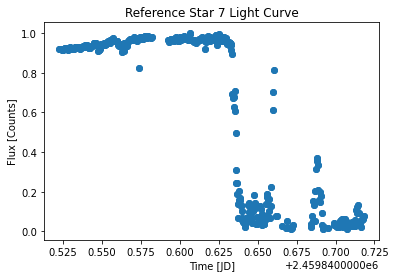

,Time [JD],Flux [Counts],Flux Error [Counts]
0,2.459841e+06,0.973511,0.004486
1,2.459841e+06,0.978112,0.004489
2,2.459841e+06,0.971863,0.004476
3,2.459841e+06,0.975841,0.004483
4,2.459841e+06,0.963239,0.004459
...,...,...,...
430,2.459841e+06,0.978441,0.004481
431,2.459841e+06,0.978449,0.004482
432,2.459841e+06,0.977157,0.004478
433,2.459841e+06,0.971732,0.004467


In [16]:
path = r"C:\Users\zombi\Desktop\The Cool Group (Jack Jon Melinda)\Lab2\CATNEW"
dir_list = os.listdir(path)
accuracy = 0.001
fileIndex = []

#7TH REF STAR
r7Flux = []
r7FluxUnc = []
for j in range(444):
    df = pd.read_csv(path + "\\" + str(dir_list[j]), delim_whitespace=True, skiprows=17, header=None, usecols=[3,4,5,6])
    dfArray = df.to_numpy()
    s = str(dir_list[j])
    r = ''.join(x for x in s if x.isdigit())
    r = int(r)
    if r < 100000:
        r %= 10
    if r < 1000000:
        r %= 100
    if r < 10000000:
        r %= 1000
    size = len(dfArray)
    #Loops thru table to find our star
    for i in range(size):
        if (dfArray[i][0] > (refStarsRA[6] - accuracy)) & (dfArray[i][0] < (refStarsRA[6] + accuracy)):
            if(dfArray[i][1] > (refStarsDec[6] - accuracy)) & (dfArray[i][1] < (refStarsDec[6] + accuracy)):
                flux = dfArray[i][2]
                fluxUnc = dfArray[i][3]
                r7Flux.append(flux)
                r7FluxUnc.append(fluxUnc) 
                fileIndex.append(r)

r7Times = []
r7ExpTimes = []
path = r"C:\Users\zombi\Desktop\The Cool Group (Jack Jon Melinda)\Lab2\Processed Sciences"
dir_list = os.listdir(path)
for i in fileIndex:
    string = dir_list[i]
    beg = string[:25]
    end = string[-4:]
    string = beg + str(i) + end
    hdulist = fits.open(path + "\\" + string)   
    fitsTime = hdulist[0].header["DATE-OBS"]
    expTime = hdulist[0].header["EXPTIME"]
    t = Time(fitsTime)
    t = t.to_value('jd')
    r7Times.append(t)
    r7ExpTimes.append(expTime)
    
r7Flux = np.array([r7Flux])
r7FluxUnc = np.array([r7FluxUnc])
r7ExpTimes = np.array([r7ExpTimes])
r7Times = np.array([r7Times])
adjustedR7Flux = r7Flux / r7ExpTimes
adjustedR7FluxUnc = r7FluxUnc / r7ExpTimes
#4.4
adjustedR7FluxMax = np.max(adjustedR7Flux)
adjustedR7Flux = adjustedR7Flux / adjustedR7FluxMax
adjustedR7FluxUnc = adjustedR7FluxUnc / adjustedR7FluxMax

#Just ignore this block tbh. BUT DONT DELETE IT. It affects the shape of the array. 
threshold = 0
indices = np.where(adjustedR7Flux < threshold)
adjustedR7FluxUnc[0][indices[1]] = 0
r7Times[0][indices[1]] = 0
adjustedR7Flux = adjustedR7Flux[adjustedR7Flux > threshold]
adjustedR7FluxUnc = adjustedR7FluxUnc[adjustedR7FluxUnc > 0.001]
r7Times = r7Times[r7Times > 0.001]

plt.xlabel('Time [JD]')
plt.ylabel('Flux [Counts]')
plt.title('Reference Star 7 Light Curve')
plt.scatter(r7Times, adjustedR7Flux)
plt.errorbar(r7Times, adjustedR7Flux, yerr=adjustedR7FluxUnc, fmt='o')
plt.show()

#Table of Refstar1 Time Flux Flux Error
dict = {'Time [JD]' : r7Times, 'Flux [Counts]' : adjustedR7Flux, 'Flux Error [Counts]' : adjustedR7FluxUnc}
r7Table = pd.DataFrame(dict)
display(r7Table)

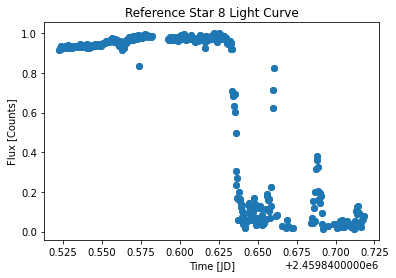

,Time [JD],Flux [Counts],Flux Error [Counts]
0,2.459841e+06,0.979010,0.005212
1,2.459841e+06,0.983999,0.005217
2,2.459841e+06,0.979146,0.005203
3,2.459841e+06,0.973172,0.005199
4,2.459841e+06,0.978688,0.005195
...,...,...,...
426,2.459841e+06,0.969825,0.005190
427,2.459841e+06,0.979518,0.005195
428,2.459841e+06,0.986191,0.005207
429,2.459841e+06,0.980153,0.005197


In [17]:
path = r"C:\Users\zombi\Desktop\The Cool Group (Jack Jon Melinda)\Lab2\CATNEW"
dir_list = os.listdir(path)
accuracy = 0.001
fileIndex = []

#8TH REF STAR
r8Flux = []
r8FluxUnc = []
for j in range(444):
    df = pd.read_csv(path + "\\" + str(dir_list[j]), delim_whitespace=True, skiprows=17, header=None, usecols=[3,4,5,6])
    dfArray = df.to_numpy()
    s = str(dir_list[j])
    r = ''.join(x for x in s if x.isdigit())
    r = int(r)
    if r < 100000:
        r %= 10
    if r < 1000000:
        r %= 100
    if r < 10000000:
        r %= 1000
    size = len(dfArray)
    #Loops thru table to find our star
    for i in range(size):
        if (dfArray[i][0] > (refStarsRA[7] - accuracy)) & (dfArray[i][0] < (refStarsRA[7] + accuracy)):
            if(dfArray[i][1] > (refStarsDec[7] - accuracy)) & (dfArray[i][1] < (refStarsDec[7] + accuracy)):
                flux = dfArray[i][2]
                fluxUnc = dfArray[i][3]
                r8Flux.append(flux)
                r8FluxUnc.append(fluxUnc) 
                fileIndex.append(r)

r8Times = []
r8ExpTimes = []
path = r"C:\Users\zombi\Desktop\The Cool Group (Jack Jon Melinda)\Lab2\Processed Sciences"
dir_list = os.listdir(path)
for i in fileIndex:
    string = dir_list[i]
    beg = string[:25]
    end = string[-4:]
    string = beg + str(i) + end
    hdulist = fits.open(path + "\\" + string)   
    fitsTime = hdulist[0].header["DATE-OBS"]
    expTime = hdulist[0].header["EXPTIME"]
    t = Time(fitsTime)
    t = t.to_value('jd')
    r8Times.append(t)
    r8ExpTimes.append(expTime)
    
r8Flux = np.array([r8Flux])
r8FluxUnc = np.array([r8FluxUnc])
r8ExpTimes = np.array([r8ExpTimes])
r8Times = np.array([r8Times])
adjustedR8Flux = r8Flux / r8ExpTimes
adjustedR8FluxUnc = r8FluxUnc / r8ExpTimes
#4.4
adjustedR8FluxMax = np.max(adjustedR8Flux)
adjustedR8Flux = adjustedR8Flux / adjustedR8FluxMax
adjustedR8FluxUnc = adjustedR8FluxUnc / adjustedR8FluxMax

#Just ignore this block tbh. BUT DONT DELETE IT. It affects the shape of the array. 
threshold = 0
indices = np.where(adjustedR8Flux < threshold)
adjustedR8FluxUnc[0][indices[1]] = 0
r8Times[0][indices[1]] = 0
adjustedR8Flux = adjustedR8Flux[adjustedR8Flux > threshold]
adjustedR8FluxUnc = adjustedR8FluxUnc[adjustedR8FluxUnc > 0.001]
r8Times = r8Times[r8Times > 0.001]

plt.xlabel('Time [JD]')
plt.ylabel('Flux [Counts]')
plt.title('Reference Star 8 Light Curve')
plt.scatter(r8Times, adjustedR8Flux)
plt.errorbar(r8Times, adjustedR8Flux, yerr=adjustedR8FluxUnc, fmt='o')
plt.show()

#Table of Refstar1 Time Flux Flux Error
dict = {'Time [JD]' : r8Times, 'Flux [Counts]' : adjustedR8Flux, 'Flux Error [Counts]' : adjustedR8FluxUnc}
r8Table = pd.DataFrame(dict)
display(r8Table)

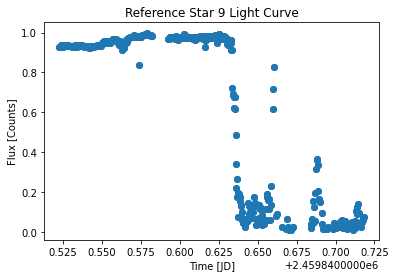

,Time [JD],Flux [Counts],Flux Error [Counts]
0,2.459841e+06,0.981345,0.002148
1,2.459841e+06,0.986833,0.002153
2,2.459841e+06,0.977453,0.002144
3,2.459841e+06,0.974418,0.002142
4,2.459841e+06,0.978539,0.002144
...,...,...,...
434,2.459841e+06,0.975837,0.002142
435,2.459841e+06,0.981817,0.002146
436,2.459841e+06,0.978138,0.002143
437,2.459841e+06,0.975561,0.002141


In [18]:
path = r"C:\Users\zombi\Desktop\The Cool Group (Jack Jon Melinda)\Lab2\CATNEW"
dir_list = os.listdir(path)
accuracy = 0.001
fileIndex = []

#9TH REF STAR
r9Flux = []
r9FluxUnc = []
for j in range(444):
    df = pd.read_csv(path + "\\" + str(dir_list[j]), delim_whitespace=True, skiprows=17, header=None, usecols=[3,4,5,6])
    dfArray = df.to_numpy()
    s = str(dir_list[j])
    r = ''.join(x for x in s if x.isdigit())
    r = int(r)
    if r < 100000:
        r %= 10
    if r < 1000000:
        r %= 100
    if r < 10000000:
        r %= 1000
    size = len(dfArray)
    #Loops thru table to find our star
    for i in range(size):
        if (dfArray[i][0] > (refStarsRA[8] - accuracy)) & (dfArray[i][0] < (refStarsRA[8] + accuracy)):
            if(dfArray[i][1] > (refStarsDec[8] - accuracy)) & (dfArray[i][1] < (refStarsDec[8] + accuracy)):
                flux = dfArray[i][2]
                fluxUnc = dfArray[i][3]
                r9Flux.append(flux)
                r9FluxUnc.append(fluxUnc) 
                fileIndex.append(r)

r9Times = []
r9ExpTimes = []
path = r"C:\Users\zombi\Desktop\The Cool Group (Jack Jon Melinda)\Lab2\Processed Sciences"
dir_list = os.listdir(path)
for i in fileIndex:
    string = dir_list[i]
    beg = string[:25]
    end = string[-4:]
    string = beg + str(i) + end
    hdulist = fits.open(path + "\\" + string)   
    fitsTime = hdulist[0].header["DATE-OBS"]
    expTime = hdulist[0].header["EXPTIME"]
    t = Time(fitsTime)
    t = t.to_value('jd')
    r9Times.append(t)
    r9ExpTimes.append(expTime)
    
r9Flux = np.array([r9Flux])
r9FluxUnc = np.array([r9FluxUnc])
r9ExpTimes = np.array([r9ExpTimes])
r9Times = np.array([r9Times])
adjustedR9Flux = r9Flux / r9ExpTimes
adjustedR9FluxUnc = r9FluxUnc / r9ExpTimes
#4.4
adjustedR9FluxMax = np.max(adjustedR9Flux)
adjustedR9Flux = adjustedR9Flux / adjustedR9FluxMax
adjustedR9FluxUnc = adjustedR9FluxUnc / adjustedR9FluxMax

#Just ignore this block tbh. BUT DONT DELETE IT. It affects the shape of the array. 
threshold = 0
indices = np.where(adjustedR9Flux < threshold)
adjustedR9FluxUnc[0][indices[1]] = 0
r9Times[0][indices[1]] = 0
adjustedR9Flux = adjustedR9Flux[adjustedR9Flux > threshold]
adjustedR9FluxUnc = adjustedR9FluxUnc[adjustedR9FluxUnc > 0.001]
r9Times = r9Times[r9Times > 0.001]

plt.xlabel('Time [JD]')
plt.ylabel('Flux [Counts]')
plt.title('Reference Star 9 Light Curve')
plt.scatter(r9Times, adjustedR9Flux)
plt.errorbar(r9Times, adjustedR9Flux, yerr=adjustedR9FluxUnc, fmt='o')
plt.show()

#Table of Refstar1 Time Flux Flux Error
dict = {'Time [JD]' : r9Times, 'Flux [Counts]' : adjustedR9Flux, 'Flux Error [Counts]' : adjustedR9FluxUnc}
r9Table = pd.DataFrame(dict)
display(r9Table)

(427,)
(427,)


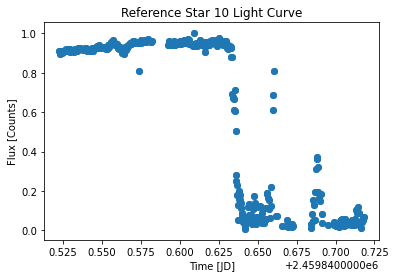

,Time [JD],Flux [Counts],Flux Error [Counts]
0,2.459841e+06,0.956166,0.005799
1,2.459841e+06,0.957554,0.005800
2,2.459841e+06,0.944709,0.005775
3,2.459841e+06,0.967731,0.005806
4,2.459841e+06,0.957152,0.005778
...,...,...,...
422,2.459841e+06,0.956719,0.005786
423,2.459841e+06,0.959620,0.005790
424,2.459841e+06,0.950832,0.005772
425,2.459841e+06,0.956105,0.005770


In [19]:
path = r"C:\Users\zombi\Desktop\The Cool Group (Jack Jon Melinda)\Lab2\CATNEW"
dir_list = os.listdir(path)
accuracy = 0.001
fileIndex = []

#10TH REF STAR
r10Flux = []
r10FluxUnc = []
for j in range(444):
    df = pd.read_csv(path + "\\" + str(dir_list[j]), delim_whitespace=True, skiprows=17, header=None, usecols=[3,4,5,6])
    dfArray = df.to_numpy()
    s = str(dir_list[j])
    r = ''.join(x for x in s if x.isdigit())
    r = int(r)
    if r < 100000:
        r %= 10
    if r < 1000000:
        r %= 100
    if r < 10000000:
        r %= 1000
    size = len(dfArray)
    #Loops thru table to find our star
    for i in range(size):
        if (dfArray[i][0] > (refStarsRA[9] - accuracy)) & (dfArray[i][0] < (refStarsRA[9] + accuracy)):
            if(dfArray[i][1] > (refStarsDec[9] - accuracy)) & (dfArray[i][1] < (refStarsDec[9] + accuracy)):
                flux = dfArray[i][2]
                fluxUnc = dfArray[i][3]
                r10Flux.append(flux)
                r10FluxUnc.append(fluxUnc) 
                fileIndex.append(r)

r10Times = []
r10ExpTimes = []
path = r"C:\Users\zombi\Desktop\The Cool Group (Jack Jon Melinda)\Lab2\Processed Sciences"
dir_list = os.listdir(path)
for i in fileIndex:
    string = dir_list[i]
    beg = string[:25]
    end = string[-4:]
    string = beg + str(i) + end
    hdulist = fits.open(path + "\\" + string)   
    fitsTime = hdulist[0].header["DATE-OBS"]
    expTime = hdulist[0].header["EXPTIME"]
    t = Time(fitsTime)
    t = t.to_value('jd')
    r10Times.append(t)
    r10ExpTimes.append(expTime)
    
r10Flux = np.array([r10Flux])
r10FluxUnc = np.array([r10FluxUnc])
r10ExpTimes = np.array([r10ExpTimes])
r10Times = np.array([r10Times])
adjustedR10Flux = r10Flux / r10ExpTimes
adjustedR10FluxUnc = r10FluxUnc / r10ExpTimes
#4.4
adjustedR10FluxMax = np.max(adjustedR10Flux)
adjustedR10Flux = adjustedR10Flux / adjustedR10FluxMax
adjustedR10FluxUnc = adjustedR10FluxUnc / adjustedR10FluxMax

#Just ignore this block tbh. BUT DONT DELETE IT. It affects the shape of the array. 
threshold = 0
indices = np.where(adjustedR10Flux < threshold)
adjustedR10FluxUnc[0][indices[1]] = 0
r10Times[0][indices[1]] = 0
adjustedR10Flux = adjustedR10Flux[adjustedR10Flux > threshold]
adjustedR10FluxUnc = adjustedR10FluxUnc[adjustedR10FluxUnc > 0.001]
r10Times = r10Times[r10Times > 0.001]
print(adjustedR10Flux.shape)
print(adjustedR10FluxUnc.shape)

plt.xlabel('Time [JD]')
plt.ylabel('Flux [Counts]')
plt.title('Reference Star 10 Light Curve')
plt.scatter(r10Times, adjustedR10Flux)
plt.errorbar(r10Times, adjustedR10Flux, yerr=adjustedR10FluxUnc, fmt='o')
plt.show()

#Table of Refstar1 Time Flux Flux Error
dict = {'Time [JD]' : r10Times, 'Flux [Counts]' : adjustedR10Flux, 'Flux Error [Counts]' : adjustedR10FluxUnc}
r10Table = pd.DataFrame(dict)
display(r10Table)

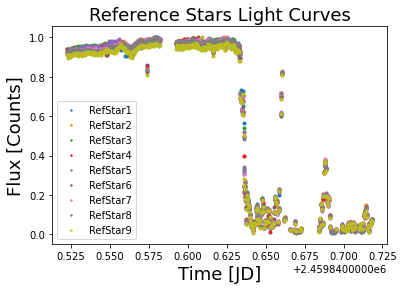

In [92]:
plt.xlabel('Time [JD]', fontsize=18)
plt.ylabel('Flux [Counts]', fontsize=18)
plt.title('Reference Stars Light Curves', fontsize=18)
plt.scatter(r1Times, adjustedr1Flux, s=2)
plt.errorbar(r1Times, adjustedr1Flux, yerr=adjustedr1FluxUnc, fmt='.')
plt.scatter(r2Times, adjustedR2Flux, s=2)
plt.errorbar(r2Times, adjustedR2Flux, yerr=adjustedR2FluxUnc, fmt='.')
plt.scatter(r3Times, adjustedR3Flux, s=2)
plt.errorbar(r3Times, adjustedR3Flux, yerr=adjustedR3FluxUnc, fmt='.')
plt.scatter(r4Times, adjustedR4Flux, s=2)
plt.errorbar(r4Times, adjustedR4Flux, yerr=adjustedR4FluxUnc, fmt='.')
plt.scatter(r5Times, adjustedR5Flux, s=2)
plt.errorbar(r5Times, adjustedR5Flux, yerr=adjustedR5FluxUnc, fmt='.')
#plt.scatter(r6Times, adjustedr6Flux, s=2)
#plt.errorbar(r6Times, adjustedr6Flux, yerr=adjustedr6FluxUnc, fmt='.')
plt.scatter(r7Times, adjustedR7Flux, s=2)
plt.errorbar(r7Times, adjustedR7Flux, yerr=adjustedR7FluxUnc, fmt='.')
plt.scatter(r8Times, adjustedR8Flux, s=2)
plt.errorbar(r8Times, adjustedR8Flux, yerr=adjustedR8FluxUnc, fmt='.')
plt.scatter(r9Times, adjustedR9Flux, s=2)
plt.errorbar(r9Times, adjustedR9Flux, yerr=adjustedR9FluxUnc, fmt='.')
plt.scatter(r10Times, adjustedR10Flux, s=2)
plt.errorbar(r10Times, adjustedR10Flux, yerr=adjustedR10FluxUnc, fmt='.')
plt.legend(['RefStar1', 'RefStar2', 'RefStar3', 'RefStar4', 'RefStar5', 'RefStar6', 'RefStar7', 'RefStar8', 'RefStar9'])
plt.show()

In [65]:
datesObsArr = np.array([datesObs])

#ALWAYS RUN THIS BEFORE THE NEXT CELL!!!
adjustedRFluxesCopy = np.array([adjustedr1Flux, adjustedR2Flux, adjustedR3Flux, adjustedR4Flux, adjustedR5Flux, 
                          adjustedR7Flux, adjustedR8Flux,  adjustedR9Flux, adjustedR10Flux])
adjustedRFluxesUncCopy = np.array([adjustedr1FluxUnc, adjustedR2FluxUnc, adjustedR3FluxUnc, adjustedR4FluxUnc, adjustedR5FluxUnc, 
                             adjustedR7FluxUnc, adjustedR8FluxUnc, adjustedR9FluxUnc, adjustedR10FluxUnc])

C:\Users\zombi\AppData\Local\Temp\ipykernel_13084\3355866356.py:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  adjustedRFluxesCopy = np.array([adjustedr1Flux, adjustedR2Flux, adjustedR3Flux, adjustedR4Flux, adjustedR5Flux,
C:\Users\zombi\AppData\Local\Temp\ipykernel_13084\3355866356.py:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  adjustedRFluxesUncCopy = np.array([adjustedr1FluxUnc, adjustedR2FluxUnc, adjustedR3FluxUnc, adjustedR4FluxUnc, adjustedR5FluxUnc,


In [66]:
# 4.5 ------------------------
#COMPARE ALL RTIMES TO HOSTTIME, IF THERE IS A MATCHING TIME, DO FLUX STUFF. 
#ALGORITHM: ALWAYS GET THE FIRST ELEMENT IF TIME IS FOUND, THEN REMOVE THE FIRST ELEMENT UNTIL NO MORE ELEMENTS LEFT
def weightedMean(flux, fluxUnc, hostTime, times):
    totalRefStars = len(flux)
    muVals = np.zeros(444)
    #For each science image
    for i in range(444):
        numSum = 0
        denSum = 0
        #Go through each reference star and sum
        for j in range(totalRefStars):
            if(hostTime[i] in times[j]):
                if(flux[j].size == 0):
                    continue
                numSum += flux[j][0] / np.square(fluxUnc[j][0])
                denSum += 1 / np.square(fluxUnc[j][0])
                flux[j] = np.delete(flux[j], 0)
            else:
                continue
            mu = numSum / denSum
            muVals[i] = mu
    return muVals
def weightedMeanUnc(fluxUnc, hostTime, times):
    totalRefStars = len(fluxUnc)
    sigmaVals = np.zeros(444)
    #For each science image
    for i in range(444):
        denSum = 0
        #Go through each reference star and sum
        for j in range(totalRefStars):
            if(hostTime[i] in times[j]):
                if(fluxUnc[j].size == 0):
                    continue
                denSum += (1 / np.square(fluxUnc[j][0]))
                fluxUnc[j] = np.delete(fluxUnc[j], 0)
            else: 
                continue
            sigma = np.sqrt(1 / denSum)
            sigmaVals[i] = sigma
    return sigmaVals

adjustedRFluxes = adjustedRFluxesCopy
adjustedRFluxesUnc = adjustedRFluxesUncCopy
hostTime = hostStarTimesArr[0]
times = np.array([r1Times, r2Times, r3Times, r4Times, r5Times, r7Times, r8Times,
                 r9Times, r10Times])
mu = weightedMean(adjustedRFluxes, adjustedRFluxesUnc, hostTime, times)
#print(mu, mu.shape)
sigma = weightedMeanUnc(adjustedRFluxesUnc, hostTime, times)
#print(sigma, sigma.shape)
ratio = adjustedHostStarFlux[0] / mu
ratioUnc = ratio * np.sqrt(np.square(adjustedHostStarFluxUnc[0] / adjustedHostStarFlux[0]) + np.square(sigma / mu))

C:\Users\zombi\AppData\Local\Temp\ipykernel_13084\3423063227.py:46: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  times = np.array([r1Times, r2Times, r3Times, r4Times, r5Times, r7Times, r8Times,
C:\Users\zombi\AppData\Local\Temp\ipykernel_13084\3423063227.py:52: RuntimeWarning: divide by zero encountered in true_divide
  ratio = adjustedHostStarFlux[0] / mu
C:\Users\zombi\AppData\Local\Temp\ipykernel_13084\3423063227.py:53: RuntimeWarning: invalid value encountered in true_divide
  ratioUnc = ratio * np.sqrt(np.square(adjustedHostStarFluxUnc[0] / adjustedHostStarFlux[0]) + np.square(sigma / mu))


In [213]:
#print(datesObsArr[0].shape)
#print(adjustedHostStarFlux[0].shape)
#print(adjustedHostStarFluxUnc[0].shape)
#print(mu.shape)
#ratio = adjustedHostStarFlux[0] / mu
#ratioUnc = adjustedHostStarFluxUnc[0] / sigma
#print(ratio.shape)
#print(ratioUnc.shape)

(444,)
(444,)
(444,)
(444,)
(444,)
(444,)


C:\Users\zombi\AppData\Local\Temp\ipykernel_13204\2111806208.py:5: RuntimeWarning: divide by zero encountered in true_divide
  ratio = adjustedHostStarFlux[0] / mu
C:\Users\zombi\AppData\Local\Temp\ipykernel_13204\2111806208.py:6: RuntimeWarning: divide by zero encountered in true_divide
  ratioUnc = adjustedHostStarFluxUnc[0] / sigma


In [91]:
dict = {'Time [YYYY-DD-MM-T]' : datesObsArr[0], 'Flux [Counts]' : adjustedHostStarFlux[0], 'Flux Error [Counts]' : adjustedHostStarFluxUnc[0],
       'Weighted Mean' : mu, 'Weighted Mean Uncertainty' : sigma, 'Ratio' : ratio, 'Ratio Error' : ratioUnc}
table = pd.DataFrame(dict)
display(table)

#Transit starts at 1:17, get range of indices of times that are before transit start time
index = range(187, 251)
index = list(index)
coolIndices = []
for i in index:
    if i == 233:
        continue
    if i == 234:
        continue
    #if '2022-09-18T00' in datesObsArr[0][i] | '2022-09-18T01:0' in datesObsArr[0][i]:
        #print(datesObsArr[0][i])
        #print(fileIndex[i])
    coolIndices.append(fileIndex.index(i))
baselineFlux = []
for i in coolIndices:
    #print(adjustedHostStarFlux[0][i])
    baselineFlux.append(adjustedHostStarFlux[0][i])
baselineFlux = np.array(baselineFlux)
baselineFlux = np.nanmean(baselineFlux)
print('baseline flux: ' + str(baselineFlux))

normalizedRatio = ratio / baselineFlux
normalizedRatioUnc = ratioUnc / baselineFlux

,Time [YYYY-DD-MM-T],Flux [Counts],Flux Error [Counts],Weighted Mean,Weighted Mean Uncertainty,Ratio,Ratio Error
0,2022-09-18T01:57:17.861,4463.9725,12.422725,0.986593,0.000974,4524.634392,13.359773
1,2022-09-18T01:57:43.176,4461.8350,12.417385,0.987612,0.000974,4517.802285,13.339203
2,2022-09-18T02:16:16.878,4401.0895,12.350670,0.978570,0.000970,4497.471324,13.385192
3,2022-09-18T02:54:09.201,4399.3855,12.349415,0.980536,0.000971,4486.714079,13.355224
4,2022-09-18T02:54:34.645,4419.0810,12.357080,0.982694,0.000971,4496.902908,13.336664
...,...,...,...,...,...,...,...
439,2022-09-18T02:52:02.094,4402.2115,12.355825,0.977727,0.000969,4502.496660,13.402277
440,2022-09-18T02:52:27.533,4402.5580,12.334205,0.981942,0.000971,4483.523066,13.320028
441,2022-09-18T02:52:52.953,4442.1240,12.373085,0.979338,0.000969,4535.842187,13.408246
442,2022-09-18T02:53:18.365,4449.7385,12.385700,0.982802,0.000971,4527.604810,13.372311


baseline flux: 4343.273403225806


In [82]:
with open(r'C:\Users\zombi\Desktop\The Cool Group (Jack Jon Melinda)\Lab2\fourPointFiveData.txt', 'a') as f:
    dfAsString = table.to_string(header=True, index=False)
    f.write(dfAsString)

In [83]:
#Converts from HH:MM:SS to minutes
def convertToMins(stringTime):
    #stringTime will be in HH:MM:SS format
    hour = int(stringTime[:2])
    minute = int(stringTime[3:5])
    second = int(stringTime[-2:])
    return round(((hour * 60) + minute + (second / 60.0)), 3)

#Start Time of Transit is ~1:17
startTime = '01:17:00'
convertedStartTime = convertToMins(startTime)
print('start time: {} mins from 00:00:00 UTC'.format(convertedStartTime))

#Mid-Transit Time is 2:53:16
midTime = '02:53:16'
convertedMidTime = convertToMins(midTime)
print('mid-transit time: {} mins from 00:00:00 UTC'.format(convertedMidTime))

#CONVERT OBSERVATION TIMES INTO MINUTES FROM 00:00 UTC
timesMin = []
for i in datesObsArr[0]:
    s = i[-12:-4]
    m = convertToMins(s)
    timesMin.append(m)
timesMin = np.array(timesMin)

start time: 77.0 mins from 00:00:00 UTC
mid-transit time: 173.267 mins from 00:00:00 UTC


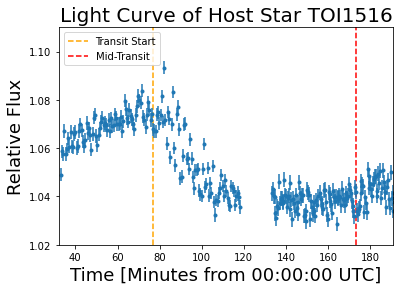

In [90]:
plt.xlabel('Time [Minutes from 00:00:00 UTC]', fontsize = 18)
plt.ylabel('Relative Flux', fontsize = 18)
plt.title('Light Curve of Host Star TOI1516', fontsize=20)
xmin = 32
xmax = 191
ymin = 1.02
ymax = 1.11
plt.xlim([xmin, xmax])
plt.ylim([ymin, ymax])
plt.vlines(convertedStartTime, ymin, ymax, 'orange', 'dashed', 'Transit Start')
plt.vlines(convertedMidTime, ymin, ymax, 'red', 'dashed', 'Mid-Transit')
plt.scatter(timesMin, normalizedRatio, s=2)
plt.errorbar(timesMin, normalizedRatio, yerr=normalizedRatioUnc, fmt='.')
plt.legend()
plt.show()